# 43008: Reinforcement Learning

## Week 8: Function Approximation Methods:
## Part A: Neural Network-Based Function Approximation

* Simple single layer, single neuron-based NN for FA
* Multi-layer, multiple-neuron-based NN for FA

### What you will learn?
* Implement a single neuron-based NN
* Implement a multiple neuron-based NN

# Example-1: House price prediction

## 1) ANN using Tensorflow (1 neuron) one layer for Function Approximation

* Create a linear function

### Import Libraries

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is in

In [ ]:
import os
# Set the environment variable before importing TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Create a toy dataset for House-Price Prediction

In [ ]:
# Features (Size in SqM)
house_size = np.array([[250], [350], [400], [475], [500], [520], [650], [690], [730], [800], [820]])
# Target (house prices in 100ks)
house_price = np.array([[450], [490], [580], [650],  [720], [780], [870], [950], [1055], [1245], [1355]])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(house_size)
X_test = scaler.transform(house_size)

### Create the Neural Network and Train

In [ ]:
# Create a linear regression model
model = keras.Sequential([
    keras.layers.Dense(1, input_dim=1)  # Single neuron with input dimension 1
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history_oneLayer = model.fit(X_train, house_price, epochs=350, verbose=1)  # You can adjust the number of epochs

# Evaluate the model
mse = model.evaluate(X_test, house_price)
print(f"Mean Squared Error: {mse}")

Epoch 1/350


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 772135.2500
Epoch 2/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 741730.1250
Epoch 3/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 712529.1875
Epoch 4/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 684484.5625
Epoch 5/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 657550.3750
Epoch 6/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 631682.9375
Epoch 7/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 606839.7500
Epoch 8/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 582980.4375
Epoch 9/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 560065.9375
Epoch 10/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 538058.7500
Epoch 11/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 516923.1250
Epoch 12/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 496624.5000
Epoch 13/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 477129.6250
Epoch 14/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 458406.8125
Epoch 15/350
1/1 ━━━

### Plot loss curve

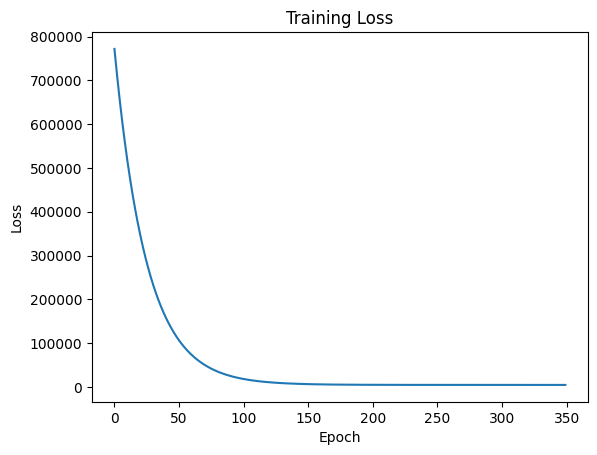

In [ ]:
# Plot training loss
plt.plot(history_oneLayer.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Predict on unknown data

In [ ]:
# Predict house price for a new input
new_input = np.array([[800]])  # Replace with your input size
new_input_scaled = scaler.transform(new_input)
predicted_price = model.predict(new_input_scaled)
print(f"House Size: {new_input} | Predicted House Price: ${predicted_price[0][0]}")  # Convert back to actual price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
House Size: [[800]] | Predicted House Price: $1194.067138671875


### Predict on complete training set and visualize

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions on Train Set 
 [[ 353.29166]
 [ 506.15994]
 [ 582.59406]
 [ 697.2453 ]
 [ 735.46234]
 [ 766.036  ]
 [ 964.7648 ]
 [1025.9121 ]
 [1087.0593 ]
 [1194.0671 ]
 [1224.6409 ]]


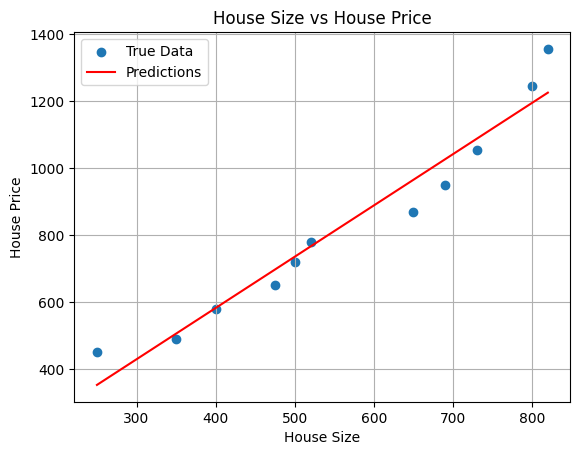

In [ ]:
# Predict and visualize
house_size_scaled = scaler.transform(house_size)
predictions = model.predict(house_size_scaled)
print("Predictions on Train Set \n",predictions)
plt.scatter(house_size, house_price, label='True Data')
plt.plot(house_size, predictions, color='red', label='Predictions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


## 2) ANN using Tensorflow (multiple neuron) one layer for Function Approximation

### Create the Neural Network and Train

#### Example Configuration to use

* Input layer : Shape: 1
* Hidden layer: Shape: 32, Activation: Relu
* Output layer: Shape: 1, Activation: linear/relu

In [ ]:
print(tf.__version__)


2.20.0


In [ ]:
# Define the model (Non-Linear)
model_multilayer_simple = tf.keras.models.Sequential([
    keras.layers.Input(shape=(1,)),              # Input layer
    keras.layers.Dense(32, activation='relu'),   # Hidden layer with ReLU activation
    keras.layers.Dense(1, activation='linear')   # Output layer with linear activation
])

# Compile the model
model_multilayer_simple.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_multiLayer_simple= model_multilayer_simple.fit(X_train, house_price, epochs=10000, verbose=1)  # You can adjust the number of epochs

# Evaluate the model
mse = model_multilayer_simple.evaluate(X_test, house_price)
print(f"Mean Squared Error: {mse}")

# Predict house prices for the training data
predicted_prices = model_multilayer_simple.predict(X_test)
print(predicted_prices)

Streaming output truncated to the last 5000 lines.
Epoch 7508/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 1902.2489
Epoch 7509/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 1901.9598
Epoch 7510/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 1901.6681
Epoch 7511/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 1901.3768
Epoch 7512/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1901.0859
Epoch 7513/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 1900.7919
Epoch 7514/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1900.5007
Epoch 7515/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - loss: 1900.2074
Epoch 7516/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 1899.9183
Epoch 7517/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 1899.6300
Epoch 7518/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 1899.3403
Epoch 7519/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 1899.0472
Epoch 7520/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - los

### Plot the loss curve

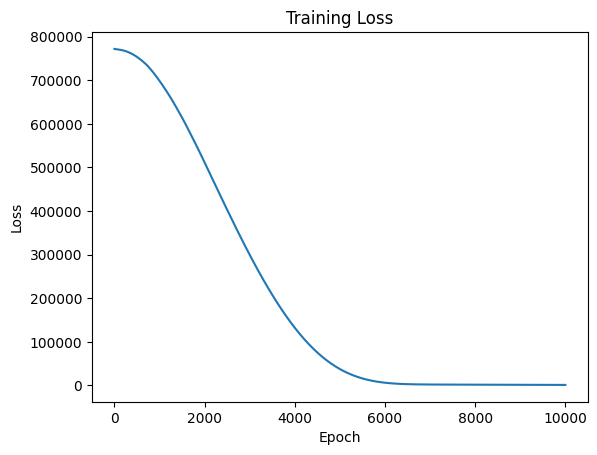

In [ ]:
# Plot training loss
plt.plot(history_multiLayer_simple.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Predict on unknown data

In [ ]:
# Predict house price for a new input
new_input = np.array([[800]])  # Replace with your input size
new_input_scaled = scaler.transform(new_input)
predicted_price = model_multilayer_simple.predict(new_input_scaled)
print(f"House Size: {new_input} | Predicted House Price: ${predicted_price[0][0]}")  # Convert back to actual price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
House Size: [[800]] | Predicted House Price: $1247.3331298828125


### Predict on complete training set and visualize

In [ ]:
# Predict and visualize
house_size_scaled = scaler.transform(house_size)
predictions = model_multilayer_simple.predict(house_size_scaled)
print("Predictions on Train Set \n",predictions)
plt.scatter(house_size, house_price, label='True Data')
plt.plot(house_size, predictions, color='red', label='Predictions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


# Example-2: Approximate the relationship between a car's engine horsepower and its fuel efficiency (miles per gallon, MPG) using a neural network.

In [ ]:
import pandas as pd

# Load the dataset (you can replace this with your dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
raw_dataset = pd.read_csv(url, names=column_names, sep='\s+', na_values='?')
dataset = raw_dataset.dropna()

# Select the features (in this case, we'll use only 'Horsepower' as a feature)
features = dataset['Horsepower']
target = dataset['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))


### Create Neural netwrok and train

In [15]:
# Create a neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),          # Input layer
    keras.layers.Dense(10, activation='relu'),  # Hidden layer with ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model to approximate the relationship between horsepower and MPG
history = model.fit(X_train_scaled, y_train, epochs=1000, verbose=0)  # You can adjust the number of epochs

# Generate predictions using the trained model
y_pred = model.predict(X_test_scaled)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


### Plot results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


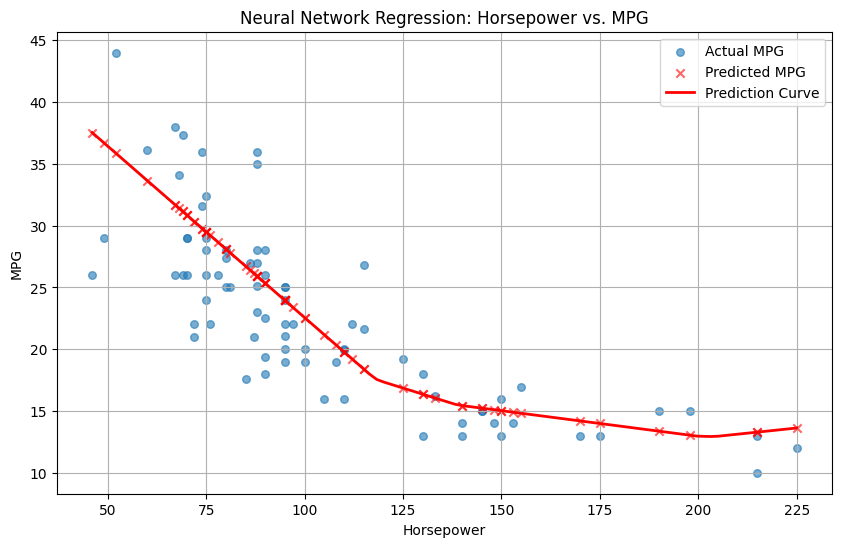

In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual MPG', s=30, alpha=0.6)
plt.scatter(X_test, y_pred, label='Predicted MPG', color='red', marker='x', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Neural Network Regression: Horsepower vs. MPG')
plt.grid(True)

# Add a line plot for the prediction curve
x_curve = np.linspace(X_test.min(), X_test.max(), 100)
y_curve = model.predict(scaler.transform(x_curve.reshape(-1, 1)))
plt.plot(x_curve, y_curve, color='red', label='Prediction Curve', linewidth=2)
plt.legend()

plt.show()
